# Simple Hands-On Exercises for training algorithms

In this part, you'll learn:
- Different situations you will encounter during training
- What "training" means
- How model parameters improve step by step
- What SGD does — one example at a time
---

## 🧪 Exercise 1: Guess-the-Number Game (Simulate Training)

Alex is playing a guessing game where the teacher hides a secret number (7.5) 🎯. He starts with a wrong guess (0) and each round he checks how far off he is using a score card (the loss function). To improve, Alex adds +1.0 each time, moving closer step by step until his guess is near the secret number.

**This simple game shows how training works in AI: make a guess, measure the mistake, adjust, and repeat until you learn the right answer.**

In [1]:
# The hidden "target" value (like ground truth)
target = 7.5

# Initial guess (like model parameter)
guess = 0.0

# Loss function: squared error
def loss(guess, target):
    return (guess - target) ** 2

# Training simulation: try to improve the guess
for step in range(10):
    print(f"Step {step+1}")
    print("Current guess:", guess)
    print("Loss:", loss(guess, target))
    guess += 1.0  # Simulate adjustment


Step 1
Current guess: 0.0
Loss: 56.25
Step 2
Current guess: 1.0
Loss: 42.25
Step 3
Current guess: 2.0
Loss: 30.25
Step 4
Current guess: 3.0
Loss: 20.25
Step 5
Current guess: 4.0
Loss: 12.25
Step 6
Current guess: 5.0
Loss: 6.25
Step 7
Current guess: 6.0
Loss: 2.25
Step 8
Current guess: 7.0
Loss: 0.25
Step 9
Current guess: 8.0
Loss: 0.25
Step 10
Current guess: 9.0
Loss: 2.25


🧠 Explain:

* The "guess" is like your model's parameter.

* The "loss" tells you how far off you are.

* Training is just guessing better, step by step.

## 🤖 Exercise 2: A Mini Model Learns from Data


Step [100/1000], Loss: 0.0076
Step [200/1000], Loss: 0.0042
Step [300/1000], Loss: 0.0023
Step [400/1000], Loss: 0.0013
Step [500/1000], Loss: 0.0007
Step [600/1000], Loss: 0.0004
Step [700/1000], Loss: 0.0002
Step [800/1000], Loss: 0.0001
Step [900/1000], Loss: 0.0001
Step [1000/1000], Loss: 0.0000


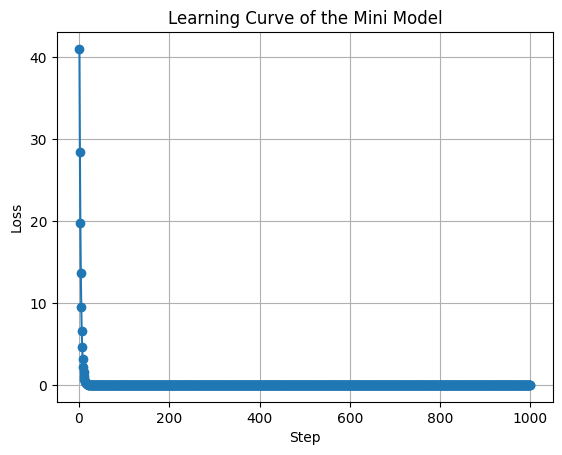


Final parameters: w = 2.0049, b = 0.9857


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Training data: y = 2x + 1
x_data = np.array([1, 2, 3, 4])
y_data = np.array([3, 5, 7, 9])

# Model parameters
w = 0.0  # weight
b = 0.0  # bias

# Learning rate (how much to adjust parameters each step)
learning_rate = 0.01

# To store loss values for plotting
losses = []

# Number of training steps
num_steps = 1000

# Training loop
for step in range(num_steps):
    # Make a prediction
    y_pred = w * x_data + b

    # Calculate the loss (Mean Squared Error)
    loss = np.mean((y_pred - y_data) ** 2)
    losses.append(loss) # Store loss for plotting

    # Calculate gradients (how much w and b contribute to the error)
    # This is a simplified derivative of the loss function with respect to w and b
    gradient_w = np.mean(2 * (y_pred - y_data) * x_data)
    gradient_b = np.mean(2 * (y_pred - y_data))

    # Update parameters using gradients and learning rate
    w = w - learning_rate * gradient_w
    b = b - learning_rate * gradient_b

    # Print progress occasionally
    if (step + 1) % 100 == 0:
        print(f'Step [{step+1}/{num_steps}], Loss: {loss:.4f}')


# ---- Plot the learning curve ----
plt.plot(range(1, num_steps + 1), losses, marker='o')
plt.title("Learning Curve of the Mini Model")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Print final parameters
print(f"\nFinal parameters: w = {w:.4f}, b = {b:.4f}")

## 🧠 Let's Understand Stochastic Gradient Descent (SGD)


### 🧪 Step 1: A Tiny Dataset

Given the input and target data, We want to learn a simple rule to descrive their correlations.   

$x_{input} = [1, 2, 3]$

$y_{target} = [3, 5, 7]$




In [4]:
import torch

# --- Step 1: Dataset (Tensor) ---
x_data = torch.tensor([1.0, 2.0, 3.0]).unsqueeze(1)  # shape (3,1)
y_data = torch.tensor([3.0, 5.0, 7.0]).unsqueeze(1)  # shape (3,1)

### 🔧 Step 2: Start With a Bad Model

We use a simple model:

**`y = w * x + b`**

Final parameters:
  w = 1.9999998807907104
  b = 1.0000003576278687
  Expected relation: y = 2x + 1


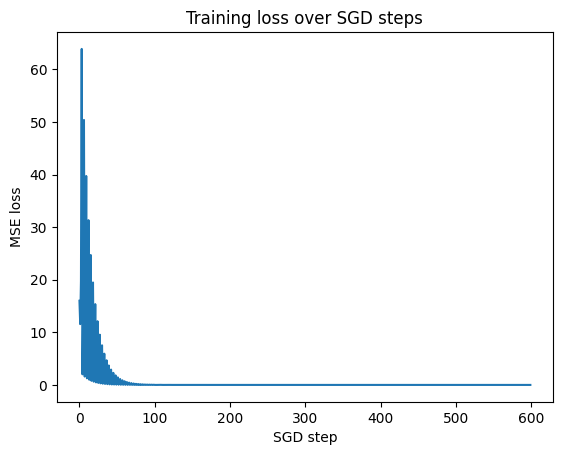

/tmp/ipython-input-4212203281.py:92: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  plt.plot(xs.numpy(), y_fit.numpy(), label=f"trained model y={float(w):.3f}x+{float(b):.3f}")


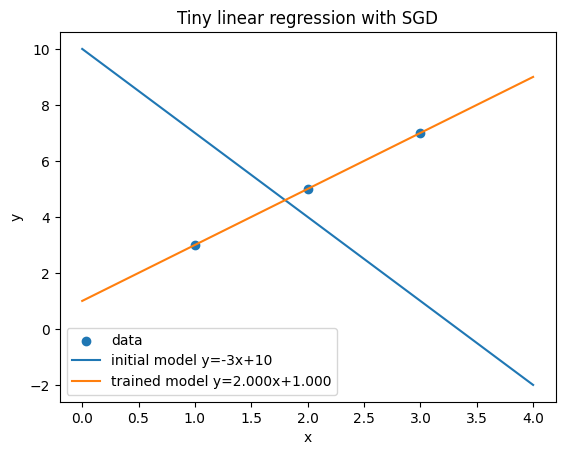


First few steps (w, b, loss):
step  0: w=-3.8000, b= 9.2000, loss= 16.000000
step  1: w=-2.4400, b= 9.8800, loss= 11.560000
step  2: w= 0.2240, b= 10.7680, loss= 19.713600
step  3: w=-1.3744, b= 9.1696, loss= 63.872059
step  4: w=-1.9427, b= 8.8854, loss= 2.018671
step  5: w= 0.4229, b= 9.6740, loss= 15.545036


In [5]:
# --- Step 2: Define Model manually ---
# SGD on a Tiny Dataset (Colab-ready, run this cell)

import torch
import math
import matplotlib.pyplot as plt
from typing import List, Tuple

# --- Step 1: Dataset (Tensor) ---
x_data = torch.tensor([1.0, 2.0, 3.0]).unsqueeze(1)  # shape (3,1)
y_data = torch.tensor([3.0, 5.0, 7.0]).unsqueeze(1)  # shape (3,1)

# --- Step 2: Define Model manually ---
# y = w * x + b
w = torch.tensor([-3.0], requires_grad=True)   # bad start on purpose
b = torch.tensor([10.0], requires_grad=True)

def predict(x: torch.Tensor) -> torch.Tensor:
    return w * x + b

# --- Step 3: Loss function (MSE) ---
def mse_loss(y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
    return ((y_pred - y_true) ** 2).mean()

# --- Step 4: True SGD training loop (per-sample updates) ---
lr = 0.1
epochs = 200

history = {
    "step": [],
    "w": [],
    "b": [],
    "loss": [],
}

step = 0
for epoch in range(epochs):
    # iterate over samples individually (stochastic)
    for xi, yi in zip(x_data, y_data):
        # forward
        y_pred = predict(xi)
        loss = mse_loss(y_pred, yi)

        # backward
        loss.backward()

        # gradient step
        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad

        # book-keeping
        history["step"].append(step)
        history["w"].append(float(w.detach()))
        history["b"].append(float(b.detach()))
        history["loss"].append(float(loss.detach()))
        step += 1

        # zero grads for next iteration
        w.grad.zero_()
        b.grad.zero_()

print("Final parameters:")
print("  w =", float(w.detach()))
print("  b =", float(b.detach()))
print("  Expected relation: y = 2x + 1")

# --- Step 5: Visualize ---

# 5a) Loss over steps
plt.figure()
plt.plot(history["step"], history["loss"])
plt.xlabel("SGD step")
plt.ylabel("MSE loss")
plt.title("Training loss over SGD steps")
plt.show()

# 5b) Data points + initial vs final model
# initial model (for visualization)
w0, b0 = -3.0, 10.0
with torch.no_grad():
    xs = torch.linspace(0, 4, 100).unsqueeze(1)
    y_init = w0 * xs + b0
    y_fit = w * xs + b

plt.figure()
# scatter data
plt.scatter(x_data.numpy(), y_data.numpy(), label="data")
# initial line
plt.plot(xs.numpy(), y_init.numpy(), label="initial model y=-3x+10")
# final line
plt.plot(xs.numpy(), y_fit.numpy(), label=f"trained model y={float(w):.3f}x+{float(b):.3f}")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Tiny linear regression with SGD")
plt.show()

# Also show a couple of first steps for intuition
first_k = 6
print("\nFirst few steps (w, b, loss):")
for i in range(first_k):
    print(f"step {i:2d}: w={history['w'][i]: .4f}, b={history['b'][i]: .4f}, loss={history['loss'][i]: .6f}")



Initial params: -3.0 10.0
Final params: 1.968217134475708 1.0722496509552002


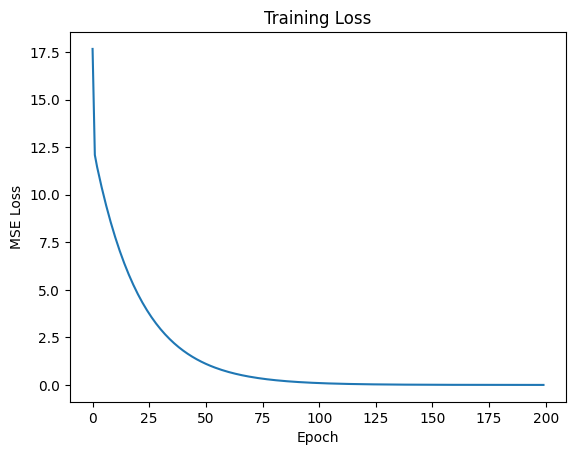

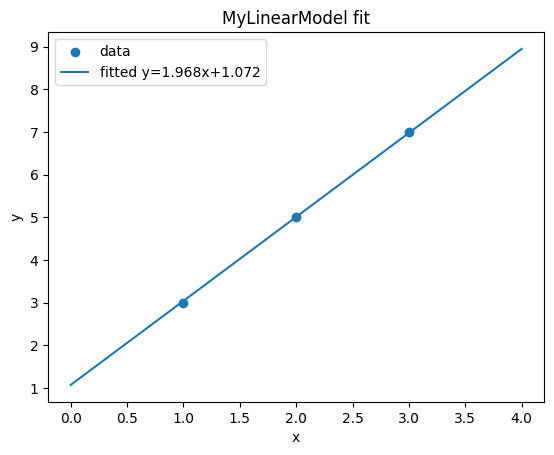

Predictions: [3.040466785430908, 5.008684158325195, 6.976901054382324]


In [12]:
# --- Tiny Linear Regression with a Custom nn.Module ---

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Data
x = torch.tensor([[1.0],[2.0],[3.0]])   # (3,1)
y = torch.tensor([[3.0],[5.0],[7.0]])   # (3,1)

# 1) Define the model class
class MyLinearModel(nn.Module):
    """y = w*x + b with explicit Parameters."""
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.tensor([-3.0]))   # bad init to see learning
        self.b = nn.Parameter(torch.tensor([10.0]))

    def forward(self, x):
        return x * self.w + self.b

# 2) Instantiate the class (now `model` has its own w and b)
model = MyLinearModel()
print("Initial params:", float(model.w.detach()), float(model.b.detach()))

# 3) Loss & optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# 4) Train
epochs = 200
loss_history = []
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

print("Final params:", float(model.w.detach()), float(model.b.detach()))

# 5) Visualize
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epoch"); plt.ylabel("MSE Loss"); plt.title("Training Loss")
plt.show()

with torch.no_grad():
    xs = torch.linspace(0, 4, 100).unsqueeze(1)
    ys = model(xs)

plt.figure()
plt.scatter(x.numpy(), y.numpy(), label="data")
plt.plot(xs.numpy(), ys.numpy(), label=f"fitted y={float(model.w):.3f}x+{float(model.b):.3f}")
plt.legend(); plt.xlabel("x"); plt.ylabel("y"); plt.title("MyLinearModel fit")
plt.show()

with torch.no_grad():
    print("Predictions:", model(x).squeeze().tolist())


### 📐 Step 3: Define Prediction and Loss Function

In [6]:
# --- Step 3: Prediction & Loss Function ---

# prediction rule (same as Step 2’s model)
def predict(x):
    return w * x + b   # y = wx + b

# Mean Squared Error loss (averages squared diffs over the batch)
criterion = torch.nn.MSELoss(reduction='mean')  # 'mean' is the default

# sanity check: compute current loss on all 3 points
with torch.no_grad():
    y_pred = predict(x_data)
    loss = criterion(y_pred, y_data)
print(f"initial MSE loss = {loss.item():.6f}")

# (optional) see per-sample losses:
with torch.no_grad():
    per_sample = torch.nn.functional.mse_loss(y_pred, y_data, reduction='none')
print("per-sample MSE:", per_sample.flatten().tolist())


initial MSE loss = 0.000000
per-sample MSE: [5.684341886080802e-14, 0.0, 0.0]


### 🏃 Step 4: Training Loop (SGD Style)
We update w and b after seeing each single point.

Epoch 100: w = 2.00, b = 1.00, loss = 0.0000
Epoch 200: w = 2.00, b = 1.00, loss = 0.0000
Epoch 300: w = 2.00, b = 1.00, loss = 0.0000
Epoch 400: w = 2.00, b = 1.00, loss = 0.0000
Epoch 500: w = 2.00, b = 1.00, loss = 0.0000
Epoch 600: w = 2.00, b = 1.00, loss = 0.0000
Epoch 700: w = 2.00, b = 1.00, loss = 0.0000
Epoch 800: w = 2.00, b = 1.00, loss = 0.0000
Epoch 900: w = 2.00, b = 1.00, loss = 0.0000
Epoch 1000: w = 2.00, b = 1.00, loss = 0.0000


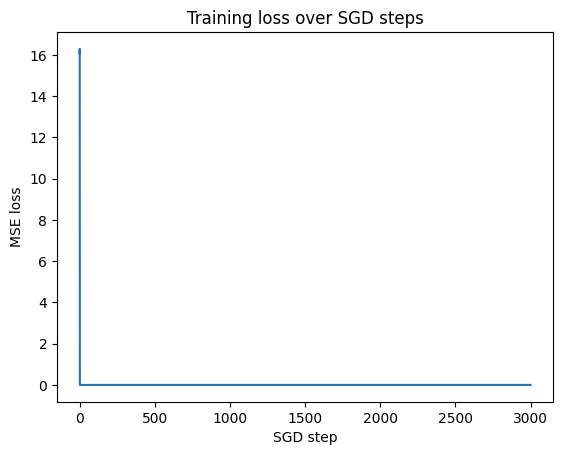

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Input dimension 1, output dimension 1

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# --- Step 5: Training Loop ---
epochs = 1000 # You can adjust this

history = {
    "step": [],
    "loss": [],
}

step = 0
for epoch in range(epochs):
    for xi, yi in zip(x_data, y_data):
        # Forward pass: compute predicted y and loss
        y_pred = model(xi) # Use the model to predict
        loss = criterion(y_pred, yi)

        # Backward pass: compute gradient
        loss.backward()

        # SGD step: update parameters
        optimizer.step()

        # Zero the gradients for the next iteration
        optimizer.zero_grad()

        # book-keeping
        history["step"].append(step)
        history["loss"].append(float(loss.detach()))
        step += 1

    # Print results
    w, b = model.parameters()
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}: w = {w.item():.2f}, b = {b.item():.2f}, loss = {loss.item():.4f}")

# --- Visualize ---
plt.figure()
plt.plot(history["step"], history["loss"])
plt.xlabel("SGD step")
plt.ylabel("MSE loss")
plt.title("Training loss over SGD steps")
plt.show()

**`y = 2x + 1`**

### 📈 Step 5: Test the Final Model

In [10]:
# --- Step 5: Testing ---
print("\n=== Testing the model ===")
x_test = torch.tensor([[4.0], [5.0], [10.0]])   # new unseen inputs
y_test_pred = model(x_test)
for x, y_pred in zip(x_test, y_test_pred):
    print(f"x = {x.item():.1f} → predicted y = {y_pred.item():.2f}")



=== Testing the model ===
x = 4.0 → predicted y = 9.00
x = 5.0 → predicted y = 11.00
x = 10.0 → predicted y = 21.00


In [11]:
import torch
import torch.nn as nn

# ----- tiny dataset -----
x = torch.tensor([[1.0],[2.0],[3.0]])   # shape (3,1)
y = torch.tensor([[3.0],[5.0],[7.0]])   # shape (3,1)

# ----- model: y = w*x + b implemented as a Linear layer -----
model = nn.Linear(in_features=1, out_features=1)  # random init

# ----- loss (criterion) -----
criterion = nn.MSELoss()                # mean of squared errors (default reduction='mean')

# ----- optimizer -----
opt = torch.optim.SGD(model.parameters(), lr=0.1)

# ----- forward → loss → backward → step -----
y_pred = model(x)                       # prediction
loss = criterion(y_pred, y)             # MSE
print("initial MSE:", loss.item())

opt.zero_grad()
loss.backward()                         # autograd computes ∂loss/∂params
opt.step()

# check loss again after one step
with torch.no_grad():
    new_loss = criterion(model(x), y).item()
print("MSE after 1 step:", new_loss)

# (optional) per-sample MSE
with torch.no_grad():
    per_sample = nn.functional.mse_loss(model(x), y, reduction='none')
print("per-sample MSE:", per_sample.squeeze().tolist())


initial MSE: 47.14067077636719
MSE after 1 step: 0.6038928627967834
per-sample MSE: [0.014212503097951412, 0.418337345123291, 1.3791288137435913]
